## Copyright [2025] [Indian Institute of Science, Bangaluru]
## SPDX-License-Identifier: Apache-2.0

## Experiment 2 : Channel Frequency Response of IEEE 802.11ax indoor channel models

### *1. Learning objectives*

• To create a single user (SU) high efficiency (HE) format configuration object and initialize the
transmit parameters for the HE-SU format of IEEE 802.11ax standard.

• To configure a TGax channel of 20 MHz bandwidth.

• To obtain Channel Frequency Response, |Hi| using HE-LTF field of packet preamble.

• To obtain the statistical distribution of channel gain, $|H_i|^2$.

• To compare the channel gain, $|H_i|^2$ for different channel models.

### *2. Theory*


• In the previous experiment, we have seen six channel models, out of which three channel models are widely used for the proposal. When you compare the channel models B, D and E, 
 channel model E has the highest RMS delay spread, maximum delay, and breakpoint distance.

|Parameter |Usage Model|RMS delay spread (ns)|Maximum delay (ns)|Breakpoint distance (m) | Number of taps|
|:-----:|:-----:|:---:|:-----:|:-----:|:-----:|
|Model-B (Indoor Residential)|Intra room, room to room |15   |80   |5 |9 |
|Model-D (Indoor typical office) |Offices – cubes farms, open areas and large classrooms |50   |390   |10 |18  |
|Model-E (Indoor Large Office/Warehouse) |Indoor Hotspots with large rooms |100   |730   |20 |18  |

### *3. Results*

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Averaged 3 channel realizations for Model B</p>
    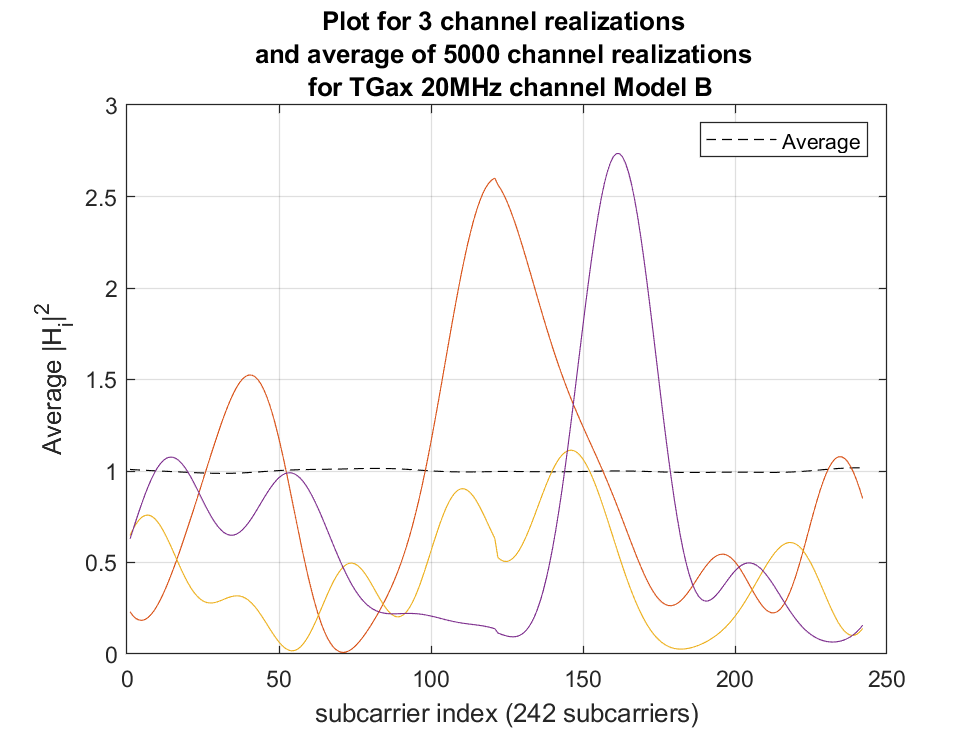
</div>


<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Averaged 3 channel realizations for Model D</p>
    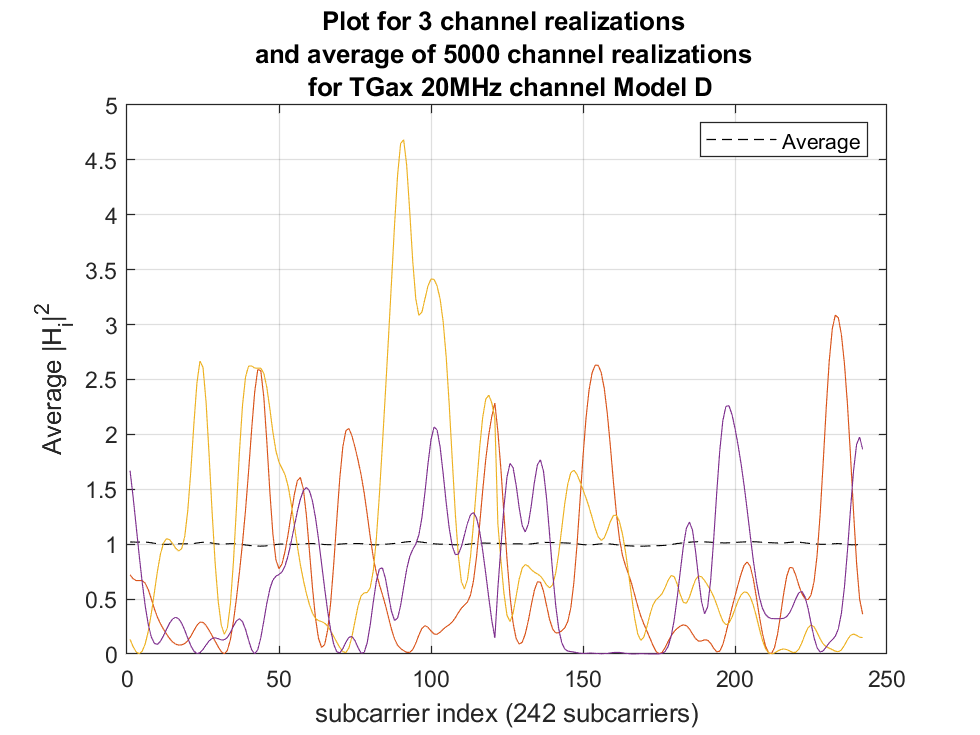
</div>


<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Averaged 3 channel realizations for Model E</p>
    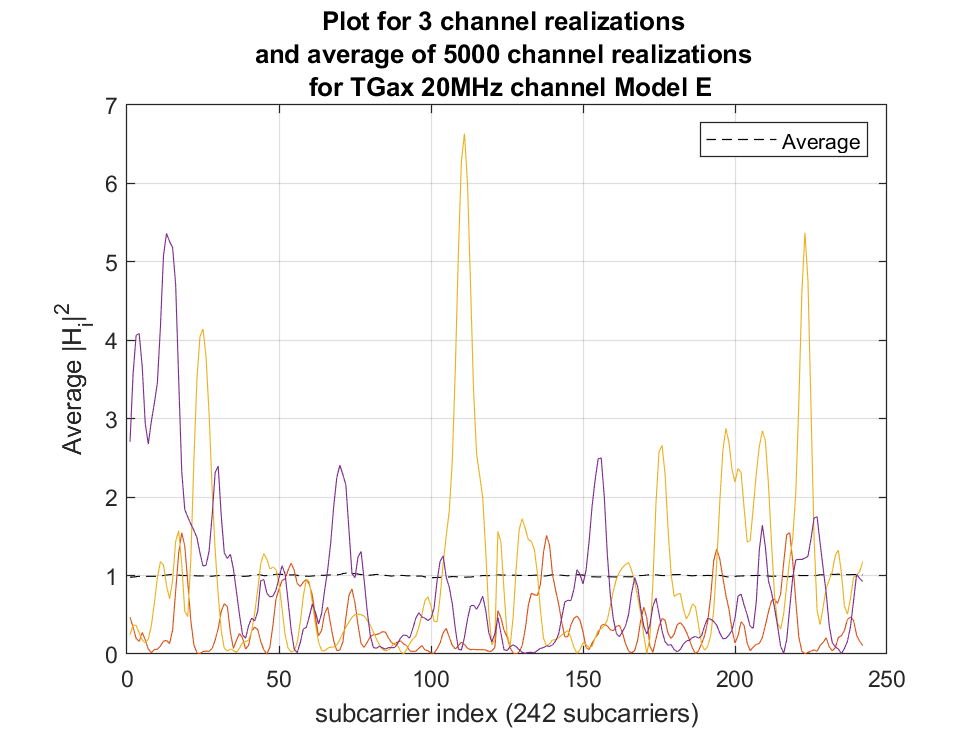
</div>


<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Histogram for 5000 realizations</p>
    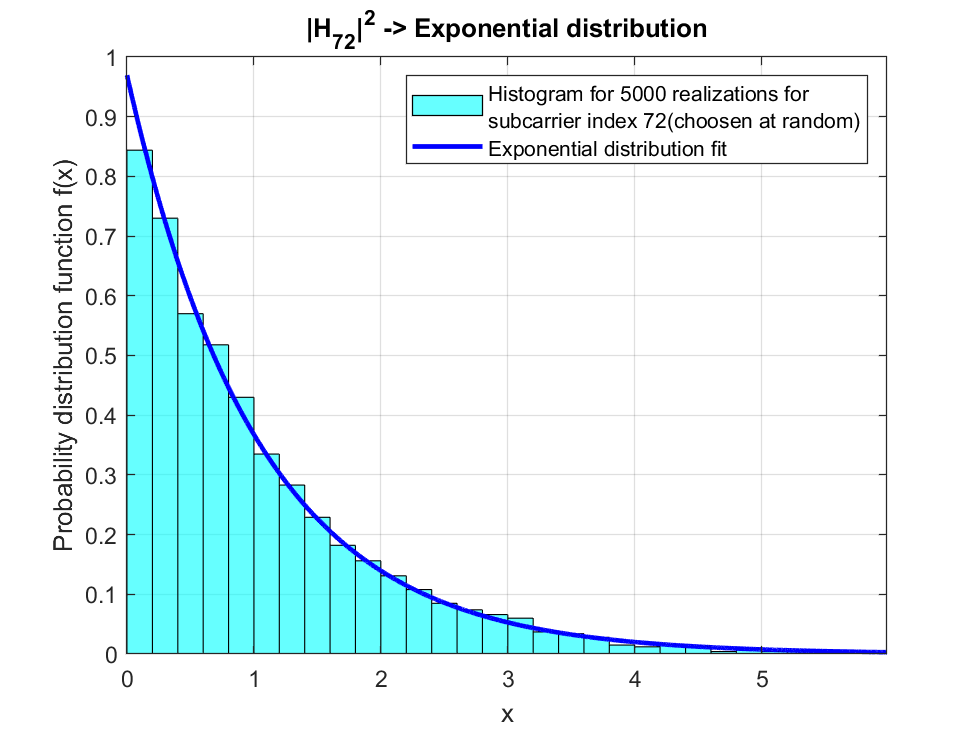
</div>



• From these results, it is obvious that variation in channel model E is more than channel model B and D. This is because the RMS delay spread increases from channel model B to E.

• As we know, if the delay spread is much less than the symbol duration, then the signal bandwidth is much less than the channel's coherence bandwidth. If the coherence BW is larger than the signal bandwidth then all frequency components of the signal will experience the same magnitude of fading and the channel is said to be frequency flat.

• Channel Model E has more delay spread, Delay increases the coherence BW decreases, and the channel is becoming more and more frequency selective.


### *4. Summary*

• Each sub-carrier is  modeled as a circularly symmetric complex Gaussian random variable with zero mean. 

• Magnitude of channel frequency response |Hi| follows Rayleigh PDF and magnitude-square $|H_i|^2$ follows exponential distribution.

• Channel model E has a longer delay spread than the other two channel models and, therefore, is more frequency selective. 


### *Note: For better clarity, watch [Channel Frequency Response of IEEE 802.11ax indoor channel models](https://www.youtube.com/watch?v=WtBSpFKrPnE&list=PLNN9TCnjABcYHR9XRiQitBCHJUeT_58QG&index=4&t=4s) on CNI YouTube channel*

### *4. Code*

In [1]:
%%%% Program to find Channel Frequency Response (CFR) of the 
%populated subcarriers of HE-LTF field 
 clc;close all;clear all;
% Create the HE packet configuration and transmit waveform.
cfgSU = wlanHESUConfig; %wlanHESUConfig creates a single user (SU) high efficiency (HE)format configuration object. This object contains the transmit
    %parameters for the HE-SU format of IEEE P802.11ax/D3.1 standard.
cfgSU.ChannelBandwidth='CBW20';
cfgSU.APEPLength=100;% Data field carry PSDU's. Specify PSDU length
chanBW = cfgSU.ChannelBandwidth;%default 20MHz channel

Create the HE packet configuration and transmit waveform parameters for the HE-SU format of IEEE P802.11ax/D3.1 standard.
wlanHESUConfig creates a single user (SU) high-efficiency (HE)format configuration object. This object contains the transmit data field carrying PSDUs. Specify the PSDU length and create a PSDU.  The operational channel Bandwidth is 20MHz.

In [2]:
psdu = randi([0 1], getPSDULength(cfgSU)*8, 1);                  
txWaveform = wlanWaveformGenerator(psdu,cfgSU);                   % Ns x Nt
Tx_power=mean(txWaveform.*conj(txWaveform))                       %Watts
ind=wlanFieldIndices(cfgSU);
HELTF_transmitted = txWaveform((ind.HELTF(1):ind.HELTF(2)), :);


Tx_power = 0.9965


The wlanWaveformGenerator generates a transmit waveform with size Ns X Nt. Ns is the number of complex symbols, and Nt is the number of transmitting antennas. As we considered SISO, Nt is 1. WLAN waveform generator takes the random bits generated as the input parameter. These bits are mapped to the constellation symbols using the constellation mapper. And these complex constellation symbols are again fed to the IFFT block to get the complex samples. Hence, the Tx waveform is a set of complex samples.

The wlanfieldIndices gives different index points for different fields within the packet.


In [3]:
tgax = wlanTGaxChannel('ChannelBandwidth','CBW20');
tgax.TransmitReceiveDistance=12;% in meters, breakpoint distance that obeys freespace pathloss model for Model B is 5m
tgax.LargeScaleFadingEffect = 'PathLoss';    
tgax.SampleRate = 100e6;
tgax.PathGainsOutputPort = true;
tgax.DelayProfile='Model-D';
info_tgax=info(tgax)
PL_updated_dB=info(tgax).Pathloss

info_tgax = struct with fields:
           ChannelFilterDelay: 0
    ChannelFilterCoefficients: [18x40 double]
                   PathDelays: [0 1.0000e-08 2.0000e-08 3.0000e-08 4.0000e-08 5.0000e-08 6.0000e-08 7.0000e-08 8.0000e-08 9.0000e-08 1.1000e-07 1.4000e-07 1.7000e-07 2.0000e-07 2.4000e-07 2.9000e-07 3.4000e-07 3.9000e-07]
             AveragePathGains: [0 -0.9000 -1.7000 -2.6000 -3.5000 -4.3000 -5.2000 -6.1000 -6.9000 -7.8000 -4.7000 -7.3000 -9.9000 -12.5000 -13.7000 -18 -22.4000 -26.7000]
                     Pathloss: 69.6163

PL_updated_dB = 69.6163


Configure a TGax channel with 20 MHz bandwidth. The distance between the transmitter and receiver is set to 12m, and the sample rate is 100 MHz. 


In [4]:
input = zeros(100,1); input(1) = 1;
impr1 = tgax(input);
impr1=impr1.';
[tgax_output,pathgains] = tgax(txWaveform);
info_tgax = info(tgax);
nonZeroTapIdx = round(info_tgax.PathDelays*tgax.SampleRate)+1;
Nh = size(info_tgax.ChannelFilterCoefficients,2);
impr = zeros(Nh,1);
impr(nonZeroTapIdx) = pathgains(1,:);

 We are passing the impulse input through the TGax channel. We have created 100 zeroes for the input, and the first sample is set to one. So, this is like an impulse input to the Tgax channel. We obtained the impulse response as impr1. For more details listen to the recording Expt_2_Channel frequency response.mp4.

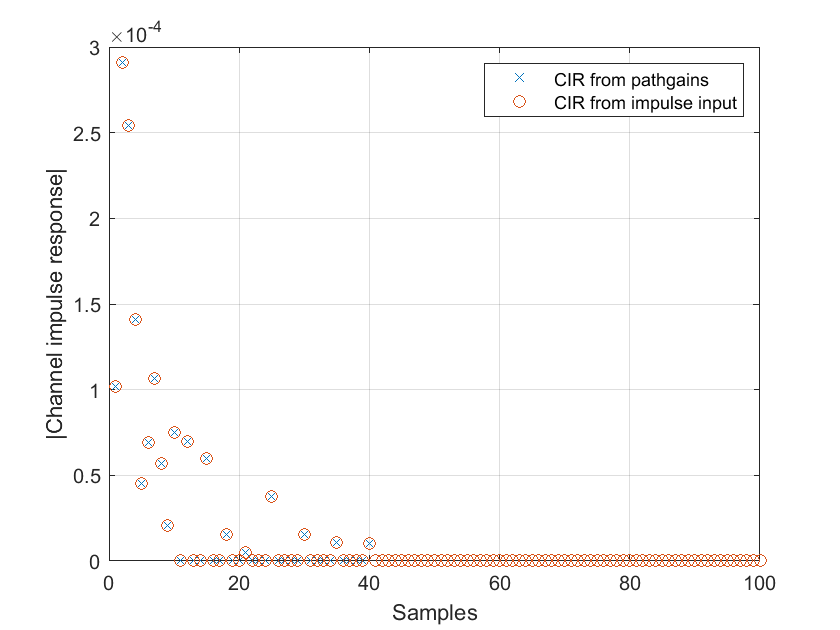

In [5]:
figure(1);
plot(abs(impr),'x');grid on;
hold on; 
plot(abs(impr1),'o');
legend('CIR from pathgains','CIR from impulse input');
xlabel('Samples')
ylabel('|Channel impulse response|')


Figure(1) plots the absolute values of impulse responses (impr and impr1) obtained by two different methods. The plot function is used with markers 'x' and 'o' to represent the data points. It also adds grid lines to the plot and labels the axes. Additionally, it adds a legend to distinguish between the two methods of obtaining the impulse response.

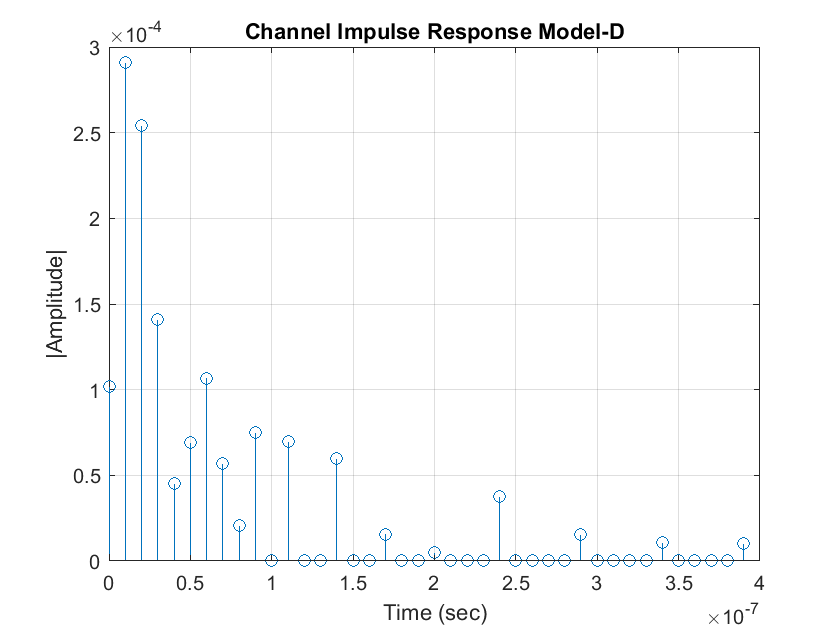

In [6]:
figure(2)
time = (1/tgax.SampleRate)*(0:length(impr)-1);
stem(time,abs(impr));grid on
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('Channel Impulse Response Model-D')

Figure(2) plots the absolute values of the CIR (impr) against the "time" axis. The stem function plots discrete data points, and the time vector is generated based on the sampling rate of the channel (tgax.SampleRate). Grid lines are added to the plot, and labels are added to the axes with the title.


In [7]:
Xk=wlanHEDemodulate(HELTF_transmitted,'HE-LTF',chanBW,cfgSU.GuardInterval,cfgSU.HELTFType);

HELTF_Tx_power=mean(Xk.*conj(Xk)) ; % 1W
%disp('HE-LTF transmit symbol is')
 %disp(real(Xk))

wlanHEDemodulate demodulates the HE-LTF symbols using the specified configuration parameters (chanBW, cfgSU.GuardInterval, cfgSU.HELTFType). The result is stored in the variable Xk. The transmit power of the HE-LTF symbols is computed. 

In [8]:
%%file HELTF_func_avg_est_Hf.m
%%%%Own script to find Channel Frequency Response (CFR) of the populated subcarriers 
%of HE- LTF field for (MODEL D) Delay Profile

function [CFR,pg]=HELTF_func_avg_est_Hf(cfgSU,Xk,tgax,txWaveform)
L=5000;%L is the Number of channel realizations
hk_hat=[];
for l=1:L
 reset(tgax); % Reset channel for different realization
% Pass the waveform through the fading tgax channel model
[tgax_output,pathgains] = tgax(txWaveform);

%%% 11ax FADING channel
rxWaveform=tgax_output;
ind = wlanFieldIndices(cfgSU);
rxHELTF= rxWaveform((ind.HELTF(1):ind.HELTF(2)), :);
%     HELTF: [721 1040]

A1=size(rxHELTF); % [320  1]
heltfDemod = wlanHEDemodulate(rxHELTF,'HE-LTF',cfgSU.ChannelBandwidth,cfgSU.GuardInterval, cfgSU.HELTFType);
%frequency domain view, its on every subcarrier
%fft(complex numbers)= complex constellation symbols on every subcarrier faded by the channel
%size(heltfDemod) % [242 1]
Yk= heltfDemod;

% channel estimation
% Lkk=[Lk(7:32) Lk(34:59)];%% 33rd values is zero
for kk=1:242
estimated_hk(kk)= Yk(kk)/Xk(kk); % estimated CFR [1 242]
end
% estimated_hk=[estimated_hk(1:121) zeros(1,3) estimated_hk(122:242)];
estimated_hk1=estimated_hk.';%[242 1]
hk_hat=[hk_hat estimated_hk1 ]; % matrix of size 242 X L
hk_abs=abs(hk_hat);
CFR=hk_abs;
pg=hk_abs.^2;% matrix of size 242 X L
 % every column of pg has Hk^2 for k from 1 to 242, 
 %corresponding to one channel realization
end
end

File HELTF_func_avg_est_Hf.m created successfully.

The function HELTF_func_avg_est_Hf is defined in the above cell. 

In [9]:
[CFR,pg]=HELTF_func_avg_est_Hf(cfgSU,Xk,tgax,txWaveform);

The function HELTF_func_avg_est_Hf is called to estimate the Channel Frequency Response (CFR) and path gains by passing channel configuration (cfgSU), demodulated HE-LTF, channel model (tgax), and the transmitted waveform (txWaveform).

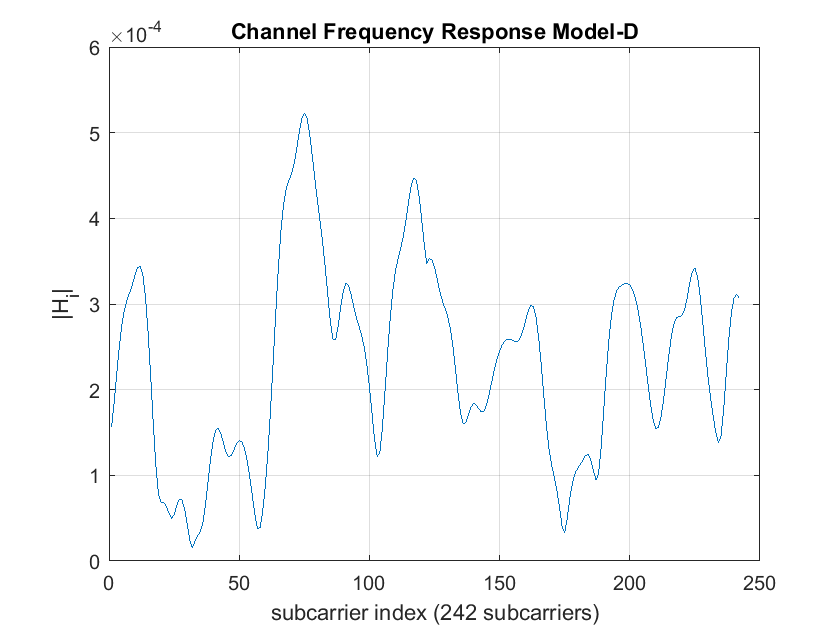

In [10]:
kk=1:242;
figure(3)
plot(kk,(CFR(:,90)));grid on;
title("Channel Frequency Response Model-D")
xlabel('subcarrier index (242 subcarriers)');
ylabel('|H_i|');


Figure(3) is the channel frequency response |Hi| of channel model D across all subcarriers. 


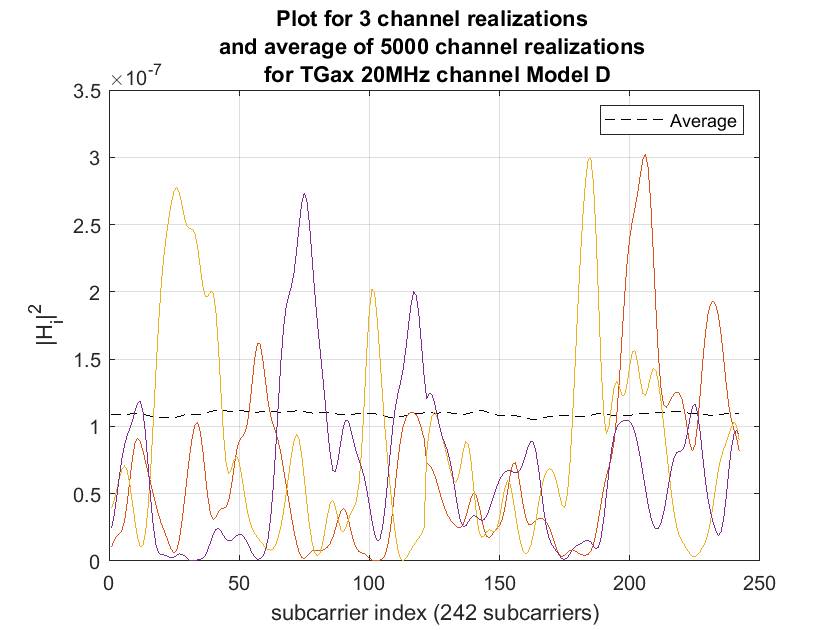

In [11]:
figure(4)
plot(kk,(mean(pg,2)),'k--');grid on;% Find the mean column-wise
hold on;
plot(kk,(pg(:,10)));hold on;%Plot  for every subcarrier
plot(kk,(pg(:,40)));hold on;
plot(kk,(pg(:,90)));hold on;
title("Plot for 3 channel realizations "+newline+"and average of 5000 channel realizations "+newline+" for TGax 20MHz channel Model D")
xlabel('subcarrier index (242 subcarriers)');
ylabel('|H_i|^2');
legend('Average')


To sketch three realizations and the average of 5000 channel realizations.
Figure(4) visualizes the channel gains $|H_i|^2$ across all subcarriers for different channel realizations (10, 40, and 90). It helps in understanding the frequency-selective characteristics of the channel and can be helpful to for channel equalization and signal processing in OFDM-based communication systems.

The pg(:, channel realization) has the channel gains across all sub-carriers for the specified channel realization.  The hold-on command allows multiple such plots to be overlaid on the figure.


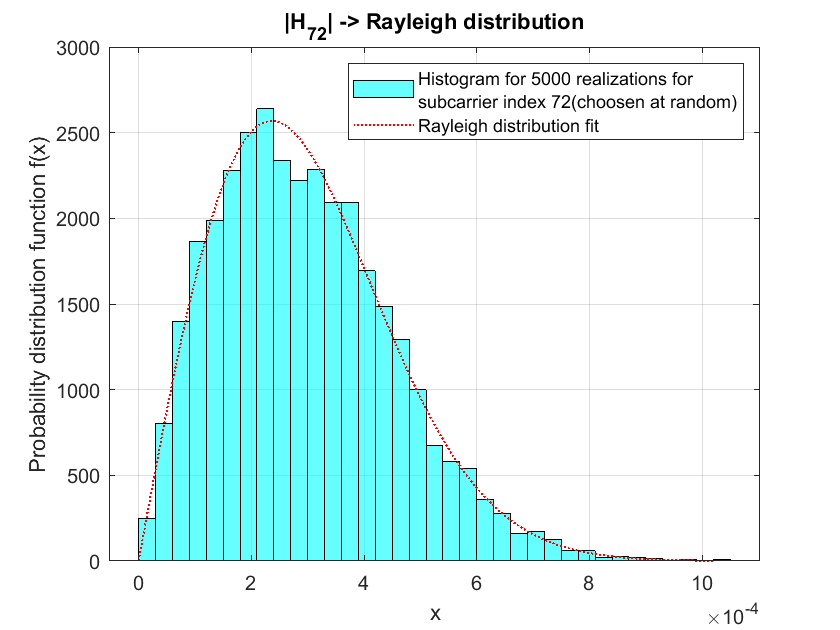

zz1 = 
  <a href="matlab: helpPopup prob.RayleighDistribution">RayleighDistribution</a>

  Rayleigh distribution
    B = 0.000236173   [0.000232945, 0.000239492]

In [12]:
row_vec1=CFR(72,:);%each row is the ensemble of sampled random variable 
  %correspondng to a subcarrier index, k, here k=72 ie |H72|
figure(5) 
AA3=histogram(row_vec1);   
AA3.Normalization='pdf';
AA3.FaceColor=[0 1 1];
   hold on ;
  zz1 = fitdist(row_vec1','rayleigh')
  l1=0;l2=max(row_vec1);
x1= l1:((l2-l1)/1000):l2;
hold on; grid on;
 y1=raylpdf(x1,zz1.B);

plot(x1,y1,'r:','LineWidth',1);hold on;
    grid on;
    title('|H_7_2| -> Rayleigh distribution')
    xlabel('x');
    ylabel('Probability distribution function f(x)');
    legend("Histogram for 5000 realizations for "+newline+"subcarrier index 72(choosen at random)",'Rayleigh distribution fit')

Each row in CFR is the ensemble of a random variable |Hk|, corresponding to a subcarrier index, k. Thus, row_vec1=CFR(72,:) has |H72|.
The above cell plots a histogram of the data stored in row_vec1, with the normalization set to PDF for proper probability scaling. The face color of the histogram is set to cyan ([0 1 1]). Figure (5) shows the statistical distribution of |Hk| for k=72. 

fitdist from the Statistics and Machine Learning Toolbox fits a Rayleigh distribution to the data in row_vec1. The resulting parameters of the fitted distribution are stored in the zz1 object. The Rayleigh PDF fit overlays the histogram plot. The hold-on command ensures that the histogram and PDF are plotted on the same axes. The grid on command adds grid lines to the plot.

mu_Hi_squared = 1.1156e-07

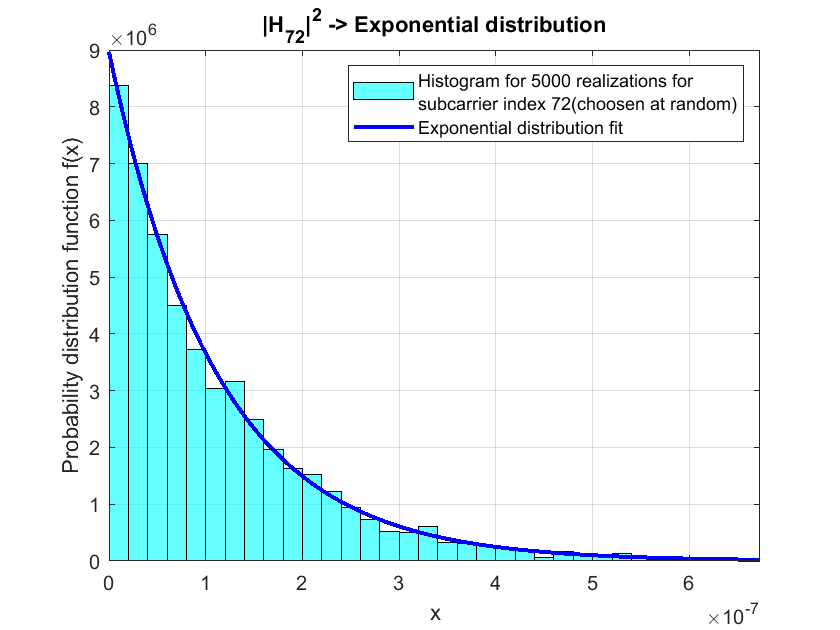

In [13]:
row_vec2=pg(72,:);%each row is the ensemble of sampled random variable 
  %correspondng to a subcarrier index, k, here k=72 ie |H72|^2
  mu_Hi_squared=mean(row_vec2)%% 
   std_dev=std(row_vec2);%% 
   variance= std_dev.^2 ;
   
figure(6)   
AA3=histogram(row_vec2); %exponential PDF  
AA3.Normalization='pdf';
AA3.FaceColor=[0 1 1];
   hold on ;
   lambda2=1/mu_Hi_squared;
x = linspace(0,6*std_dev,4000);
y = lambda2*(exp(-(lambda2.*x)));
xlim([0 6*std_dev]);
plot(x,y,'b-','LineWidth',2);
    grid on;
    title('|H_7_2|^2 -> Exponential distribution')
    xlabel('x');
    ylabel('Probability distribution function f(x)');
    legend("Histogram for 5000 realizations for "+newline+"subcarrier index 72(choosen at random)",'Exponential distribution fit')

Each row in pg is the ensemble of a random variable |Hk|^2, corresponding to a subcarrier index, k. Thus, row_vec2=pg(72,:) has |H72|^2. The above cell plots a histogram of the data stored in row_vec2, with the normalization set to PDF for proper probability scaling. The face color of the histogram is set to cyan ([0 1 1]). Figure (6) shows the statistical distribution of |Hk|^2 for k=72. 

These calculations provide statistical insights into the distribution of the random variable |Hk|^2. The mean (mu_Hi_squared), standard deviation (std_dev), and variance (variance) are commonly used summary statistics to describe the central tendency and dispersion of a dataset.
 
The above cell also calculates the parameters for the exponential distribution fit based on the mean (mu_Hi_squared) and 
generates x values from 0 to 6 times the standard deviation (std_dev). It then calculates the corresponding  
 values using the formula for exponential distribution and plots the fit in blue with a solid lin 
 A legend distinguishes between the histogram and the exponential pdf fit.


Allocation info:
                    NumUsers: 1
                      NumRUs: 1
                   RUIndices: 1
                     RUSizes: 242
               NumUsersPerRU: 1
    NumSpaceTimeStreamsPerRU: 1
       PowerBoostFactorPerRU: 1
                   RUNumbers: 1



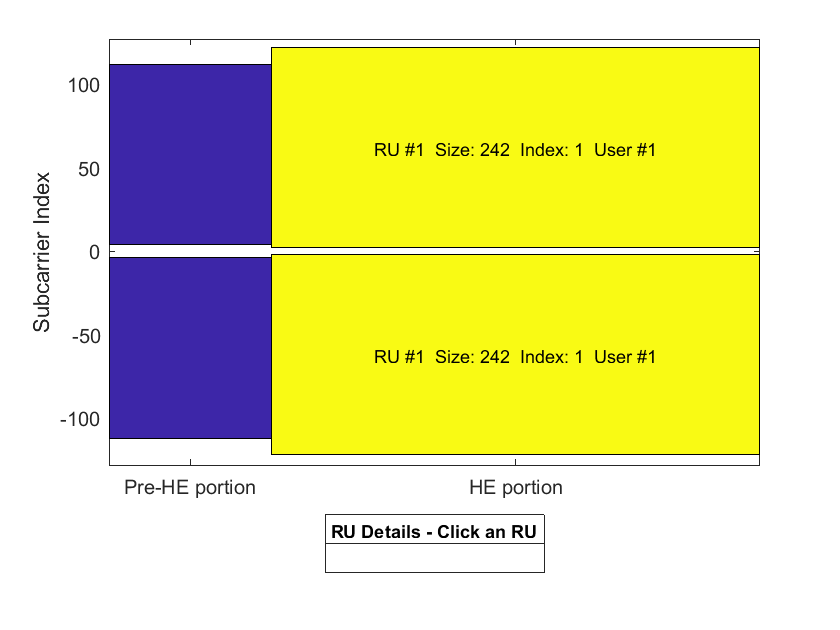

In [14]:
allocInfo = ruInfo(cfgSU);
disp('Allocation info:')
disp(allocInfo)
showAllocation(cfgSU)

This line generates allocation information for the resource units based on the configuration object cfgSU. The ruInfo function returns information about the allocation of resource units,
which can include details such as the number of users, number of resource units, RU size, number of users per RU.
The RU Allocation info is displayed on the command window.
The showAllocation function generates a plot and displays RU allocation information. It helps to visualize how the available spectrum is divided among different users.
